<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alvaro Morales
- Nombre de alumno 2: Eduardo Faundez

### **Link de repositorio de GitHub:** `https://github.com/AlvaroMoralesS/Lab_Faundez_Morales`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [27]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [28]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [29]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.9+ MB


El dataset corresponde a las ventas online, compuesto por las columnas de:
- Invoice: variable categórica, que representa el id de la factura de compra (única por cada tienda y cliente).
- StockCode: variable categórica), que indica el codigo de cada producto, en las tiendas.
- Description: variable string, con la descripción del producto.
- Quantity: variable entera, que denota la cantidad de producto que se facturó.
- InvoiceDate: variable de tipo date, que indica la fecha y hora de la compra.
- Price: variable float, con el precio al que fue vendido cada producto.
- Customer ID: variable categórica, con el identificador del Cliente
- Country: variable de tipo string, con el atributo de país.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable se refiere a visualizar el tipo de variable y distribución de los datos, para percibir la magnitud de la variable, estadísticas descriptivas, la forma de la distribución y si existen datos outliers. Para el caso multivariable, se refiere a evaluar si existe interacción, patrones y/o correlación entre las distintas variables. En el caso que exista correlación puede generar sesgo, pues una variable podría tener más peso respecto a las demás. Respecto a datos faltantes, se deben analizar pues introducen sesgo en los modelos, debido a la falta de información implicando malas conclusiones y/o decisiones. La idea es analizar estos componentes a modo de tener modelos eficientes, tratando de reducir el sesgo y/o distorsiones en los resultados.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [31]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [32]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations           525461
Mean                            4.68883
Std                             146.127
Min                            -53594.4
25%                                1.25
50%                                 2.1
75%                                4.21
Max                             25111.1
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                            64868.3
Skew                           -140.768
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

- La columna precio es una variable continua.

- Como se muestra en ambos gráficos, la variable posee una distribución desbalanceada hacia la izquierda. Además posee curtosis positiva que indica una distribución elevada (o apuntada). Notar existe una discrepancia entre el desbalance que indica el gráfico versus el skewness, el cual se debe a que el gráfico trunca el rango del precio desde cero en adelante.

- Analizando en detalle la estadística descriptiva, la media es de 4.68 y el 75% de los datos se encuentra por debajo de 4.21. Si bien los datos están concentrados alrededor de 4 , la desviación estándar es de 146.12, por tanto, la presencia de outliers es significativa. Los valores mínimos y máximos son -53594.36 y 25111 que por intuición pueden ser errores de tipeo o devoluciones de productos.

- No posee datos faltantes, sin embargo, contiene 3687 observaciones con valor cero.


 

In [33]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations           417534
Unique                             4383
Top                               14911
Freq                               5710
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1249954 bytes
dtype: object

- El Customer ID es una variable categórica.

- Existen 107927 observaciones faltantes, que representa un 20.54% de la base.

- La base contiene registro de sólo 4383 clientes.

- El gráfico muestra un ranking de clientes con mayor número de compras (no necesariamente cantidad de items), destacando el ID de cliente 14911 con 5710 observaciones. Esto indica que este cliente en particular realizó una gran cantidad de transacciones en comparación con otros clientes.


In [34]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

- La columna Country es un string.

- Esta columna no posee valores faltantes, lo que indica que se tiene información completa sobre el país en todas las transacciones registradas.

- Existen sólo 40 paises distintos en la base. sto indica la diversidad geográfica de las transacciones realizadas.

- United Kingdom posee el mayor número de compras, con un total de 485852 observaciones.

- El gráfico muestra el ranking de paises con mayor número de compras, liderado por United Kingdom, mientras que el pais con menor cantidad es Lebanon. 

In [35]:
profile_serie(df_retail['InvoiceDate']) 

c:\Users\alvaro.morales\AppData\Local\Continuum\anaconda3\envs\sskajs\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 525461
Unique                                  25296
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         520400
Duplicate rows (%)                    99.04 %
Total size in memory            4203816 bytes
dtype: object

- La columna InvoiceDate es de tipo datetime.
- Posee un rango desde 01/12/2009 hasta 09/12/2010.
- No posee datos faltantes.
- El gráfico indica el nivel de ventas en el tiempo, el cual nos muestra que desde enero a agosto el comportamiento de venta fue relativamente homogéneo, sin embargo, los meses de septiembre a diciembre son los que presentan mayores ventas en el año. Esto se podría explicar dado que en esos meses las personas realizan compras de preparación para las fiestas navideñas.

In [36]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations           525461
Mean                            10.3377
Std                             107.424
Min                               -9600
25%                                   1
50%                                   3
75%                                  10
Max                               19152
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                            6277.67
Skew                            36.0446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

- La columna Quantity es de tipo entero.

- La columna no posee datos faltantes ni nulos.

- Posee un rango entre -9600 y 19152. En este caso, por razones lógicas los valores negativos representan datos erróneos en el dataset. 

- Respecto al histograma, se aprecia una gran cantidad de outliers, tanto negativos como positivos. Además posee una distribución desbalanceada a la izquierda y posee curtosis positiva que indica una distribución apuntada.

- Como estadística descriptiva, el valor promedio es de 10.33, lo cual indica que en promedio se registran facturas con 10 unidades de producto. La desviación estándar es de 107.42, que nos señala alta dispersión en los valores. El 75% de las observaciones tienen un valor igual o menor a 10.0, lo cual indica que la mayoría de las cantidades registradas están concentradas alrededor de ese valor.

In [37]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

- La columna Descripción es de tipo string.
- Existen 4682 tipos de productos.
- Esta columna no posee valores faltantes.
- El gráfico muestra el ranking de productos con mayor venta. En este caso, el producto "WHITE HANGING HEART T-LIGHT HOLDER" está en primer lugar con 3549 instancias de compra.

In [38]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1251946 bytes
dtype: object

- La columna StockCode es de tipo string.
- Existen 4632 números de inventario.
- Esta columna no posee valores faltantes.
- El gráfico muestra el ranking de venta por número de inventario, donde el id con mayor frecuencia es 85123A con 3516 observaciones.

In [39]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2592298 bytes
dtype: object

- La columna Invoice es una variable categórica.
- Existen 28816 códigos de factura.
- Esta columna no posee valores faltantes.
- El gráfico muestra el ranking de facturas con mayor frecuencia, donde el id 537434 posee 675 observaciones.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [40]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

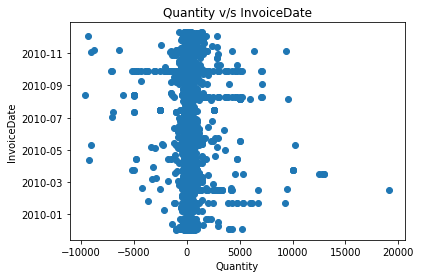

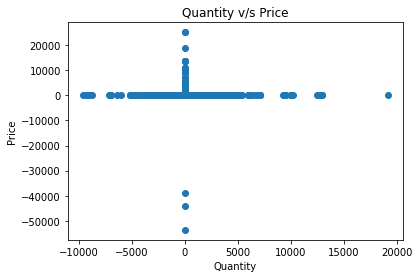

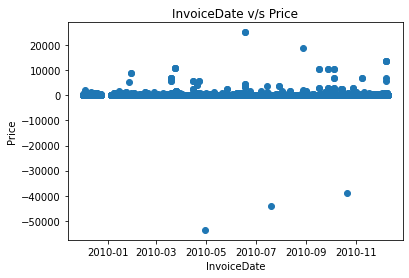

## Correlation:

## Missing Matrix:

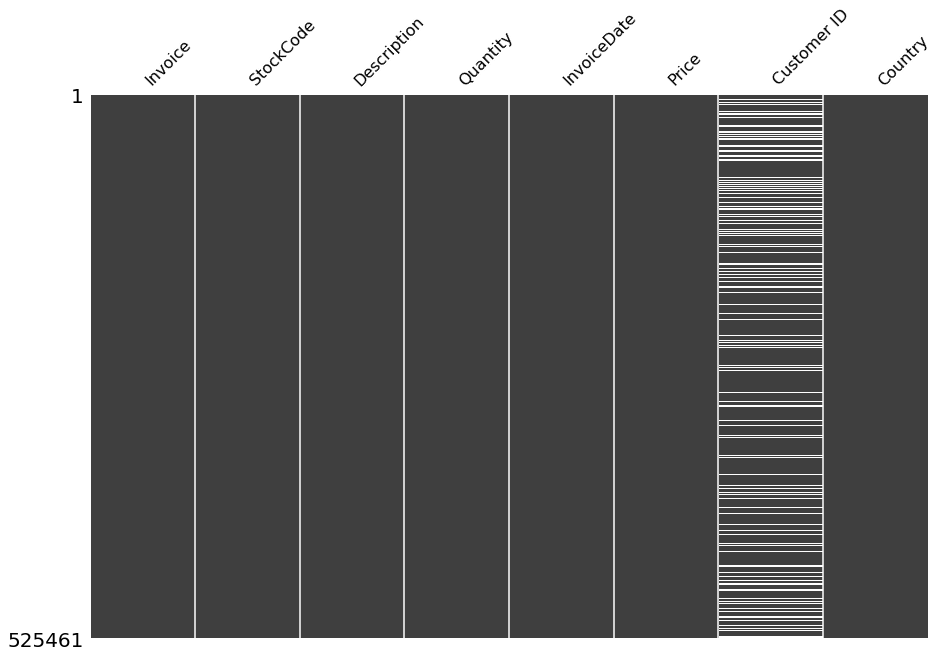

In [41]:
profile_df(df_retail)

- El gráfico de dispersión de fecha factura versus cantidad, muestra que no existe un patrón claro. Esto se debe a que se está graficando la cantidad de diferentes productos en función del tiempo. Si bien este análisis puede ser útil para controlar el abastecimiento y evitar la insatisfacción de la demanda, la presencia de outliers dificulta la identificación de un patrón general.


- Para el segúndo gráfico, por lógica las observaciones que estan en segundo, tercer y cuarto cuadrante serían erróneos, pues al menos una de las variables sería negativa. Respecto a las observaciones del primer cuadrante, cuando la cantidad es cercana a cero existe alta dispersión en el precio y viceversa, cuando el precio es cercano a cero existe alta dispersión en la cantidad.

- Para el tercer gráfico, se observa consistencia en los observaciones en el tiempo. No se aprecia una variación significativa en los precios en función de la fecha de factura, sin embargo, esto es un efecto falso ya que la presencia de outlier no permite observar patrones claros en los datos. Cabe destacar que existen 3 observaciones erróneas que poseen precio negativo.

- Según la matriz de correlación, nos indica un valor cercano a cero, por tanto no hay relación entre las variables Cantidad y Precio.

- Respecto a Missing Matrix, confirma lo dicho en la sección anterior, donde sólo la columna Customer ID presenta observaciones nulas.



### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [42]:
def Limpieza(Dataframe):
    df_cor = Dataframe[~Dataframe['Customer ID'].isnull()]

    # Eliminar valores negativos y outliers de variables numéricas
    numeric_cols = df_cor.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        df_cor = df_cor[df_cor[col]>0]
        
        # Eliminar outliers utilizando el rango intercuartílico (IQR)
        q1 = df_cor[col].quantile(0.25)
        q3 = df_cor[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cor = df_cor[(df_cor[col] >= lower_bound) & (df_cor[col] <= upper_bound)]

    return df_cor

df_cor = Limpieza(df_retail)

In [43]:
for i in df_cor.columns:
    profile_serie(df_cor[i]) 

## Invoice Profile

Type                           category
Number of observations           348613
Unique                            17216
Top                              531382
Freq                                239
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   347438
Duplicate rows (%)              99.66 %
Total size in memory      5027378 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           348613
Unique                             3644
Top                              85123A
Freq                               2500
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   348447
Duplicate rows (%)              99.95 %
Total size in memory      3687026 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                348613
Unique                                                  4019
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    2500
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        348401
Duplicate rows (%)                                   99.94 %
Total size in memory                           5577808 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations           348613
Mean                            7.12577
Std                             6.61833
Min                                   1
25%                                   2
50%                                   5
75%                                  12
Max                                  27
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           0.942399
Skew                            1.29385
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   348613
Duplicate rows (%)              100.0 %
Total size in memory      5577808 bytes
dtype: object

c:\Users\alvaro.morales\AppData\Local\Continuum\anaconda3\envs\sskajs\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 348613
Unique                                  16286
Top                       2010-11-07 16:29:00
Freq                                      239
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         347573
Duplicate rows (%)                     99.7 %
Total size in memory            5577808 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations           348613
Mean                            2.35553
Std                             1.66138
Min                               0.001
25%                                1.25
50%                                1.95
75%                                2.95
Max                                 7.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           0.739157
Skew                            1.16289
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   348585
Duplicate rows (%)              99.99 %
Total size in memory      5577808 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations           348613
Unique                             4140
Top                               17841
Freq                               4683
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   348547
Duplicate rows (%)              99.98 %
Total size in memory      3685034 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            348613
Unique                                37
Top                       United Kingdom
Freq                              320314
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    348613
Duplicate rows (%)               100.0 %
Total size in memory       5577808 bytes
dtype: object

Se reduce el dataset desde 525461 a 348613 observaciones.

Para el caso de precio, 
- Con la limpieza de los datos, existe consistencia entre el desbalance que muestra el gráfico y el valor positivo de skewness.
- Desde el punto de vista descriptivo, la media ha disminuyó desde 4.68 a 2.35. La desviación estándar también ha disminuido de 146.12 a 1.66, lo que indica una mayor concentración de los precios alrededor del promedio. Los valores mínimo y máximo son de 0 y 7.5, respectivamente.
- El percentil 75% ha disminuido de 4.21 a 2.95, lo que indica que el 75% de las observaciones tienen un precio igual o inferior a este valor. Esto sugiere una concentración de precios en valores más bajos después de la limpieza de datos.

Para variable cantidad:
- Similar a precio, el valor de skewness es consistente con el gráfico, teniendo un desbalance hacia la izquierda
- Dada la eliminación de un conjunto amplio de valores nulos y outliers, la media disminuyó respecto al dataset original desde 10.33 a 7.12. La desviación estándar baja de 107.42 a 6.61, mientras que los valores mínimo y máximo cambiaron a 1 y 27, respectivamente. 
- Por otro lado, el 75% de las observaciones pasaron de estar bajo el nivel de 10 a estar bajo el nivel de 12.

Para el resto de variables, el único efecto relevante es que se redujo la cantidad de valores únicos de cada columna.

## Bivariant Analysis:

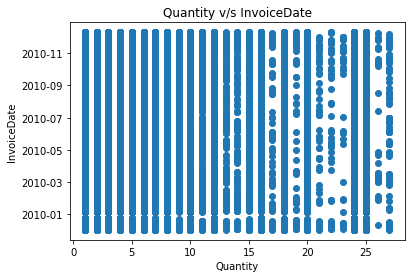

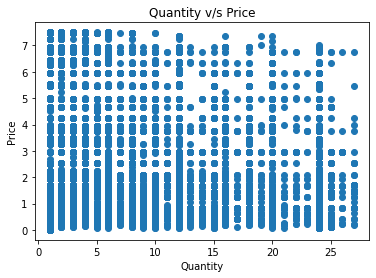

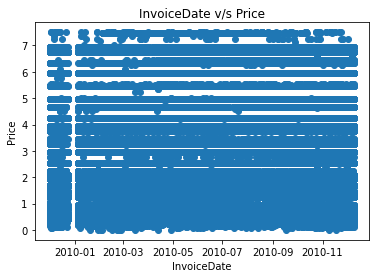

## Correlation:

## Missing Matrix:

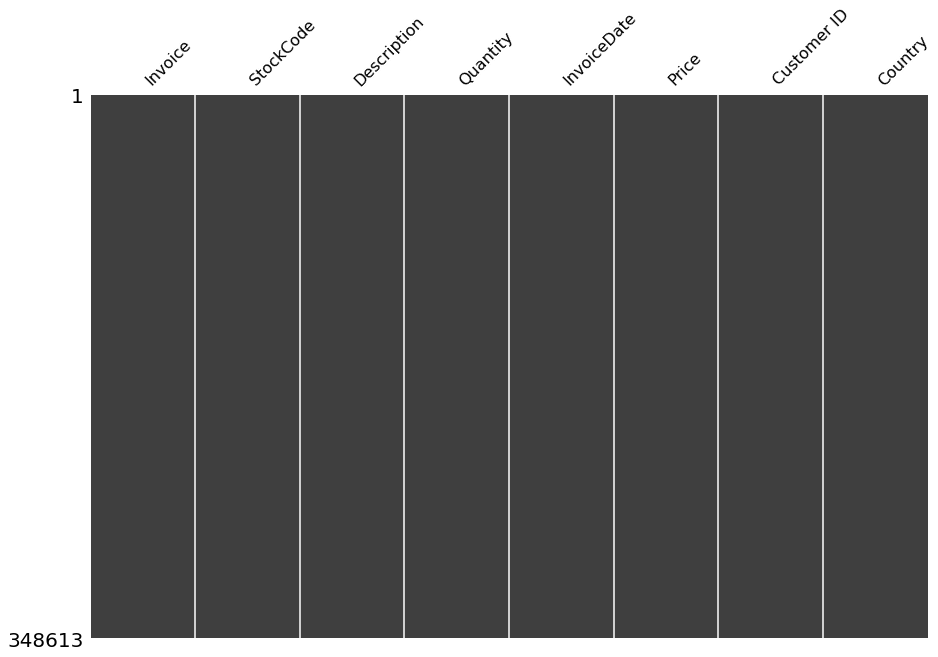

In [44]:
profile_df(df_cor)

Respecto al análisis bivariado,
- En los 3 gráficos de dispersión ya no se observan magnitudes negativan, ni tampoco outliers. Además, dado el rango acotado de las variables, no se observa un patrón claro en las observaciones. Como sugerencia, puede ser interesante estudiar el efecto por producto.
- Para el caso de correlaciones, ambas variables siguen sin relación.
- Ya no existen valores nulos en el dataset.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [45]:
def RankingProducto(df_cor):
    df_cor['Ingreso'] = df_cor['Quantity'] * df_cor['Price']
    agrupa = df_cor.groupby(['Description'], as_index=False).agg({'Ingreso':'sum','Quantity':'sum'})
    agrupa = agrupa.sort_values(by=['Ingreso'], ascending=False)
    agrupa = agrupa.head(30)
    
    fig = px.bar(agrupa,x='Description', y=['Quantity', 'Ingreso'], title='Histogram of Total Quantity and Total Ingreso by Description', height=500, barmode='group')
    fig.show()

RankingProducto(df_cor)

A partir de los gráficos generados:
- El producto "White hanging Heart T-Light Holder" presenta los mayores ingresos y además, es el producto que posee la mayor cantidad de ventas.
- El segundo producto con mayor ingreso posee bajo nivel de ventas, por tanto se debe netamente a un efecto precio.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [47]:
def plot_ventas(dataframe):
    dataframe['Dia'] = dataframe.InvoiceDate.apply(lambda x: np.datetime64(x,'D'))
    agrupa           = dataframe.groupby(['Dia'], as_index=False).agg({'Quantity':'sum'})

    fig = px.line(agrupa,x='Dia',y='Quantity', title=f"Ventas en el tiempo",)
    fig.show()

plot_ventas(df_cor)

En terminos globales, se aprecia un patron de ventas más elevado en los meses de septiembre a diciembre, que puede ser atribuido a las festividades como Navidad y Año Nuevo. Por otro lado, se observa una disminución en las ventas en enero, posiblemente debido a las vacaciones y a la reducción del gasto después de las celebraciones.

Adicionalmente, se observan peaks de venta cada 7 días. Esto podría estar relacionado con patrones de compra recurrentes por parte de los clientes, la llegada de nuevos productos o promociones de días específicos.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>